# Regresi Menggunakan Matrix Inverse pada TensorFlow

Tutorial kali ini kita akan menggunakan tensorflow untuk menyelesaikan 2 dimensional regresi linear menggunakan metode matrix inverse method. Regresi linear dapat direpresentasikan sebagai satu set persamaan matriks, misalnya _Ax = b_ . Di sini kita tertarik untuk memecahkan koefisien dalam matriks x. Kita harus berhati-hati jika matriks observasi (matriks desain) A tidak persegi. Solusi untuk memecahkan x dapat dinyatakan sebagai ![title](matrix.png). Untuk menunjukkan in, kita akan generate data dua dimensi, menyelesaikannya di TensorFlow, dan memplot hasilnya.

## Let's Go

Pertama kita memuat library yang diperlukan, menginisialisasi grafik, dan membuat data. kita akan membuat data x_vals dengan nilai 1 sampai 10 dengan banyak 100. Kemudian kita membuat y_vals menggunakan penjumlahan x_vals dan membangkitkan angka random dari distribusi normal dengan miu = 0 , sigma = 1 dan banyak 100. seperti berikut:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
sess = tf.Session()
x_vals = np.linspace(0, 10, 100)
y_vals = x_vals + np.random.normal(0, 1, 100)

In [3]:
x_vals

(array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
         0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
         1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
         1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
         2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
         2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
         3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
         3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
         4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
         4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
         5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
         5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
         6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
         6.56565657,  6.66666667,  6.76767677,  6.8

Selanjutnya kita membuat matriks dari data x_vals untuk digunakan dalam metode invers, sebelum itu kita mentranspose dan memberi nama x_vals_column. Kemudian kita membuat matriks identitas kemudian kita transpose dan memberi nama ones_column. Kita membuat matriks A, dimana isinya yaitu x_vals_column dan ones_column. Kemudian kita buat matriks b dari y_vals dan mentransposenya. Gunakan kode berikut:

In [4]:
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1, 100)))
A = np.column_stack((x_vals_column, ones_column))
b = np.transpose(np.matrix(y_vals))

In [12]:
A

matrix([[ 0.        ,  1.        ],
        [ 0.1010101 ,  1.        ],
        [ 0.2020202 ,  1.        ],
        [ 0.3030303 ,  1.        ],
        [ 0.4040404 ,  1.        ],
        [ 0.50505051,  1.        ],
        [ 0.60606061,  1.        ],
        [ 0.70707071,  1.        ],
        [ 0.80808081,  1.        ],
        [ 0.90909091,  1.        ],
        [ 1.01010101,  1.        ],
        [ 1.11111111,  1.        ],
        [ 1.21212121,  1.        ],
        [ 1.31313131,  1.        ],
        [ 1.41414141,  1.        ],
        [ 1.51515152,  1.        ],
        [ 1.61616162,  1.        ],
        [ 1.71717172,  1.        ],
        [ 1.81818182,  1.        ],
        [ 1.91919192,  1.        ],
        [ 2.02020202,  1.        ],
        [ 2.12121212,  1.        ],
        [ 2.22222222,  1.        ],
        [ 2.32323232,  1.        ],
        [ 2.42424242,  1.        ],
        [ 2.52525253,  1.        ],
        [ 2.62626263,  1.        ],
        [ 2.72727273,  1.   

Kita kemudian mengubah matriks A dan b menjadi tensor, sebagai berikut:

In [5]:
A_tensor = tf.constant(A)
b_tensor = tf.constant(b)

In [6]:
A_tensor

<tf.Tensor 'Const:0' shape=(100, 2) dtype=float64>

tf.matmul digunakan untuk mengubah 2 array (tranpose dari A_tensor , A_tensor) menjadi 1 array (tA_A). Setelah itu kita lakukan matriks invers terhadap tA_A dengan memberi simbol tA_A_inv. Kemudian kita juga membuat product dan solution. Setelah kita mengatur matriks, kita dapat menggunakan TensorFlow untuk menyelesaikannya menggunakan metode invers matriks, sebagai berikut:

In [9]:
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
tA_A_inv = tf.matrix_inverse(tA_A)
product = tf.matmul(tA_A_inv, tf.transpose(A_tensor))
solution = tf.matmul(product, b_tensor)
solution_eval = sess.run(solution)

In [14]:
solution_eval

array([[ 1.03881012],
       [-0.24808173]])

Kita sekarang ekstrak koefisien dari solution, slope dan y-intercept. Didapatkan nilai slope = 1.0388 dan y_intercept = 0.2481.

In [15]:
slope = solution_eval[0][0]
y_intercept = solution_eval[1][0]
print('slope: ' + str(slope))
print('y_intercept:' + str(y_intercept))

slope: 1.0388101164979282
y_intercept:-0.24808172836579312


Model yang digunakan adalah y_intercept +slope * i. Kemudian kita tampilkan x_vals dan y_vals dengan label data. Selanjutnya membuat best fit line pada plot. Kemudian kita bisa lihat hasil pada plot dibahah ini.

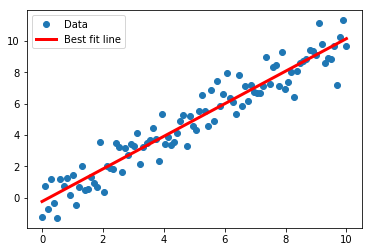

In [22]:
best_fit = []
for i in x_vals:a
    best_fit.append(y_intercept+slope*i)
plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line',linewidth=3)
plt.legend(loc='upper left')
plt.show()

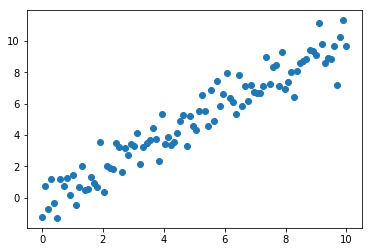

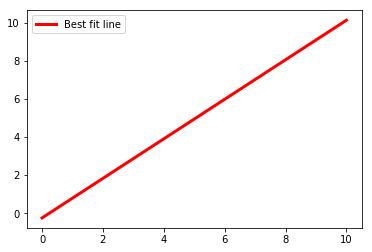